In [1]:
from src import *

In [2]:
# data_augment_from_folder(BANC_PATH, BPOS_PATH, data_augmentation_factor=1)
# max_harvest = 530
max_harvest = 100

#   Create comparable

### From a fresh kernel

In [3]:
# siamese_model = make_siamese_model(make_embedding())

# train_step = define_train_step(siamese_model)
# train = define_training_loop(siamese_model, train_step)
# print(f"Successfully created siamese model from pretrained kernel.")

# data = harvest_from_folder(anc_path=BANC_PATH, pos_path=BPOS_PATH, neg_path=NEG_PATH, n_harvest = max_harvest)
# train_data, test_data = build_dataloader_pipeline(data, max_data_size = max_harvest)

# print(f"Begining transfert learning.")
# train(train_data, n_epoch=1)
# print(f"Transfert training complete, saving transfered siamese model.")
# save_model(siamese_model, file_name='naive_siamese_model_George_C')

### From a pretrained kernel

In [4]:
# embedding_pretrained = make_embedding_from_pretrained(file_name='embedding_kernel_A')
# siamese_model = make_siamese_model(embedding_pretrained)

# train_step = define_train_step(siamese_model)
# train = define_training_loop(siamese_model, train_step)
# print(f"Successfully created siamese model from pretrained kernel.")

# data = harvest_from_folder(anc_path=BANC_PATH, pos_path=BPOS_PATH, neg_path=NEG_PATH, n_harvest = max_harvest)
# train_data, test_data = build_dataloader_pipeline(data, max_data_size = max_harvest)

# print(f"Begining transfert learning.")
# train(train_data, n_epoch=1)
# print(f"Transfert training complete, saving transfered siamese model.")
# save_model(siamese_model, file_name='pretrained_siamese_model_George_C')

# Measure performance

In [5]:
file_name = 'naive_siamese_model_Teddy_A_5'

model = make_siamese_model(make_embedding())
model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))
gross_scores_positive, gross_scores_negative = get_histogram_scores(model, max_harvest=300, force_computation=True, data_path=r'gross_scores_naive_Teddy_A_1.npz')

 44%|████▍     | 132/300 [01:46<02:15,  1.24it/s]


KeyboardInterrupt: 

100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


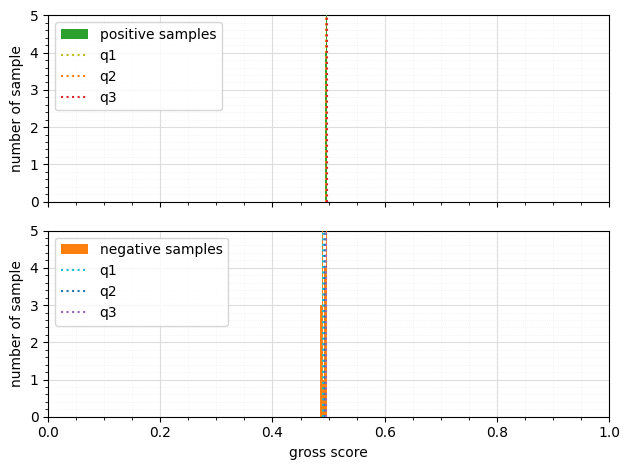

In [ ]:
file_name = 'pretrained_siamese_model_Teddy_A_5'

model = make_siamese_model(make_embedding())
model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))
gross_scores_positive, gross_scores_negative = get_histogram_scores(model, max_harvest=100, force_computation=True, data_path=r'gross_scores_pretrained_Teddy_A_1.npz')